# Problem Statement

To predict the house prices by using quantitative and qualitative features

In [528]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,8) #inbuilt figure size
sns.set_theme()

In [529]:
df_train = pd.read_csv("house_sale_train.csv")
df_test = pd.read_csv("house_sale_test.csv")

In [530]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [531]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [532]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [533]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [534]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [535]:
 df_train.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [536]:
for i in df_train.columns:
    print(f"{i} ----- {df_train[i].isnull().sum()}")

Id ----- 0
MSSubClass ----- 0
MSZoning ----- 0
LotFrontage ----- 259
LotArea ----- 0
Street ----- 0
Alley ----- 1369
LotShape ----- 0
LandContour ----- 0
Utilities ----- 0
LotConfig ----- 0
LandSlope ----- 0
Neighborhood ----- 0
Condition1 ----- 0
Condition2 ----- 0
BldgType ----- 0
HouseStyle ----- 0
OverallQual ----- 0
OverallCond ----- 0
YearBuilt ----- 0
YearRemodAdd ----- 0
RoofStyle ----- 0
RoofMatl ----- 0
Exterior1st ----- 0
Exterior2nd ----- 0
MasVnrType ----- 8
MasVnrArea ----- 8
ExterQual ----- 0
ExterCond ----- 0
Foundation ----- 0
BsmtQual ----- 37
BsmtCond ----- 37
BsmtExposure ----- 38
BsmtFinType1 ----- 37
BsmtFinSF1 ----- 0
BsmtFinType2 ----- 38
BsmtFinSF2 ----- 0
BsmtUnfSF ----- 0
TotalBsmtSF ----- 0
Heating ----- 0
HeatingQC ----- 0
CentralAir ----- 0
Electrical ----- 1
1stFlrSF ----- 0
2ndFlrSF ----- 0
LowQualFinSF ----- 0
GrLivArea ----- 0
BsmtFullBath ----- 0
BsmtHalfBath ----- 0
FullBath ----- 0
HalfBath ----- 0
BedroomAbvGr ----- 0
KitchenAbvGr ----- 0
KitchenQu

In [537]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [538]:
df_train.iloc[:15,0:15]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery


In [539]:
df_train.iloc[:15,16:31]

,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual
0,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd
1,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd
2,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd
3,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA
4,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd
5,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd
6,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex
7,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd
8,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA
9,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA


In [540]:
df_train.iloc[:15,32:45]

,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF
0,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854
1,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0
2,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866
3,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756
4,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053
5,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566
6,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0
7,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983
8,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752
9,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0


In [541]:
df_train.iloc[:15,46:65]

,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA
1,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA
2,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA
3,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA
4,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA
5,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA
6,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA
7,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA
8,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA
9,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA


In [542]:
df_train.iloc[:15,65:81]

,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,Y,0,4,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [543]:
cols = ["Id","1stFlrSF","TotRmsAbvGrd","GarageYrBlt","GarageArea","Alley","PoolQC","Fence","MiscFeature"]
df_train.drop(cols,axis = 1, inplace = True)

In [544]:
cat_cols =list(df_train.select_dtypes(include = 'object').columns)

In [545]:
num_cols = list(df_train.select_dtypes(exclude = 'object').columns)

In [546]:
num_cols.pop()

'SalePrice'

In [547]:
df_train[cat_cols]=df_train[cat_cols].astype("category")

In [549]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [510]:
#checking value counts present in each column
for i in df_train.columns:
    print(i)
    print(df_train[i].value_counts(normalize=True)*100)
    print(f"unique values of {i}-------->{len(df_train[i].unique())}")
    print("<------------------------------->")

MSSubClass
20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64
unique values of MSSubClass-------->15
<------------------------------->
MSZoning
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
unique values of MSZoning-------->5
<------------------------------->
LotFrontage
60.0     11.906744
70.0      5.828476
80.0      5.745212
50.0      4.746045
75.0      4.412989
           ...    
137.0     0.083264
141.0     0.083264
38.0      0.083264
140.0     0.083264
46.0      0.083264
Name: LotFrontage, Length: 110, dtype: float64
unique values of LotFrontage-------->111
<------------------------------->
LotArea
7200     1.712329
9600     1.643836
6000     1.164384
9000    

In [511]:
for i in df_train[num_cols]:
    print(i)
    print("Skewness: %f" % df_train[i].skew())
    print("<--------------------------->")
#### from this the data points are located after the +1 so, the data is Right Skewed.

MSSubClass
Skewness: 1.407657
<--------------------------->
LotFrontage
Skewness: 2.163569
<--------------------------->
LotArea
Skewness: 12.207688
<--------------------------->
OverallQual
Skewness: 0.216944
<--------------------------->
OverallCond
Skewness: 0.693067
<--------------------------->
YearBuilt
Skewness: -0.613461
<--------------------------->
YearRemodAdd
Skewness: -0.503562
<--------------------------->
MasVnrArea
Skewness: 2.669084
<--------------------------->
BsmtFinSF1
Skewness: 1.685503
<--------------------------->
BsmtFinSF2
Skewness: 4.255261
<--------------------------->
BsmtUnfSF
Skewness: 0.920268
<--------------------------->
TotalBsmtSF
Skewness: 1.524255
<--------------------------->
2ndFlrSF
Skewness: 0.813030
<--------------------------->
LowQualFinSF
Skewness: 9.011341
<--------------------------->
GrLivArea
Skewness: 1.366560
<--------------------------->
BsmtFullBath
Skewness: 0.596067
<--------------------------->
BsmtHalfBath
Skewness: 4.103403
<--

#no need
#def transform(df_train):
    df_train['LotFrontage'] = np.log(df_train['LotFrontage'] + 1)
    df_train['LotArea'] = np.log(df_train['LotArea'] + 1)
    df_train['MasVnrArea'] = np.log(df_train['MasVnrArea'] + 1)
    df_train['BsmtFinSF2'] = np.log(df_train['BsmtFinSF2'] + 1)
    df_train['LowQualFinSF'] = np.log(df_train['LowQualFinSF'] + 1)
    df_train['BsmtHalfBath'] = np.log(df_train['BsmtHalfBath'] + 1)
    df_train['KitchenAbvGr'] = np.log(df_train['KitchenAbvGr'] + 1)
    df_train['OpenPorchSF'] = np.log(df_train['OpenPorchSF'] + 1)
    df_train['EnclosedPorch'] = np.log(df_train['EnclosedPorch'] + 1)
    df_train['3SsnPorch'] = np.log(df_train['3SsnPorch'] + 1)
    df_train['ScreenPorch'] = np.log(df_train['ScreenPorch'] + 1)
    df_train['PoolArea'] = np.log(df_train['PoolArea'] + 1)
    df_train['MiscVal'] = np.log(df_train['MiscVal'] + 1)
transform(df_train)

In [443]:
for i in df_train[num_cols]:
    print(i)
    print("Skewness: %f" % df_train[i].skew())
    print("<--------------------------->")

MSSubClass
Skewness: 1.407657
<--------------------------->
LotFrontage
Skewness: 2.163569
<--------------------------->
LotArea
Skewness: 12.207688
<--------------------------->
OverallQual
Skewness: 0.216944
<--------------------------->
OverallCond
Skewness: 0.693067
<--------------------------->
YearBuilt
Skewness: -0.613461
<--------------------------->
YearRemodAdd
Skewness: -0.503562
<--------------------------->
MasVnrArea
Skewness: 2.669084
<--------------------------->
BsmtFinSF1
Skewness: 1.685503
<--------------------------->
BsmtFinSF2
Skewness: 4.255261
<--------------------------->
BsmtUnfSF
Skewness: 0.920268
<--------------------------->
TotalBsmtSF
Skewness: 1.524255
<--------------------------->
2ndFlrSF
Skewness: 0.813030
<--------------------------->
LowQualFinSF
Skewness: 9.011341
<--------------------------->
GrLivArea
Skewness: 1.366560
<--------------------------->
BsmtFullBath
Skewness: 0.596067
<--------------------------->
BsmtHalfBath
Skewness: 4.103403
<--

#no need
def transform(df_train):
    df_train['MSSubClass'] = np.log(df_train['MSSubClass'])
    df_train['BsmtFinSF1'] = np.log(df_train['BsmtFinSF1'])
    df_train['1stFlrSF'] = np.log(df_train['1stFlrSF'])
    df_train['BsmtFinSF2'] = np.log(df_train['BsmtFinSF2'])
    df_train['TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])
    df_train['LowQualFinSF'] = np.log(df_train['LowQualFinSF'])
    df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
    df_train['BsmtHalfBath'] = np.log(df_train['BsmtHalfBath'])
    df_train['KitchenAbvGr'] = np.log(df_train['KitchenAbvGr'])
    df_train['WoodDeckSF'] = np.log(df_train['WoodDeckSF'])
    df_train['EnclosedPorch'] = np.log(df_train['EnclosedPorch'])
    df_train['3SsnPorch'] = np.log(df_train['3SsnPorch'])
    df_train['ScreenPorch'] = np.log(df_train['ScreenPorch'])
    df_train['PoolArea'] = np.log(df_train['PoolArea'])
    df_train['MiscVal'] = np.log(df_train['MiscVal'] )
transform(df_train)

In [444]:
for i in df_train[num_cols]:
    print(i)
    print('Skewness:%f' %df_train[i].skew())
    print("<--------------->")

MSSubClass
Skewness:1.407657
<--------------->
LotFrontage
Skewness:2.163569
<--------------->
LotArea
Skewness:12.207688
<--------------->
OverallQual
Skewness:0.216944
<--------------->
OverallCond
Skewness:0.693067
<--------------->
YearBuilt
Skewness:-0.613461
<--------------->
YearRemodAdd
Skewness:-0.503562
<--------------->
MasVnrArea
Skewness:2.669084
<--------------->
BsmtFinSF1
Skewness:1.685503
<--------------->
BsmtFinSF2
Skewness:4.255261
<--------------->
BsmtUnfSF
Skewness:0.920268
<--------------->
TotalBsmtSF
Skewness:1.524255
<--------------->
2ndFlrSF
Skewness:0.813030
<--------------->
LowQualFinSF
Skewness:9.011341
<--------------->
GrLivArea
Skewness:1.366560
<--------------->
BsmtFullBath
Skewness:0.596067
<--------------->
BsmtHalfBath
Skewness:4.103403
<--------------->
FullBath
Skewness:0.036562
<--------------->
HalfBath
Skewness:0.675897
<--------------->
BedroomAbvGr
Skewness:0.211790
<--------------->
KitchenAbvGr
Skewness:4.488397
<--------------->
Firepl

# Exlporatory Analysis

In [446]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.express as px

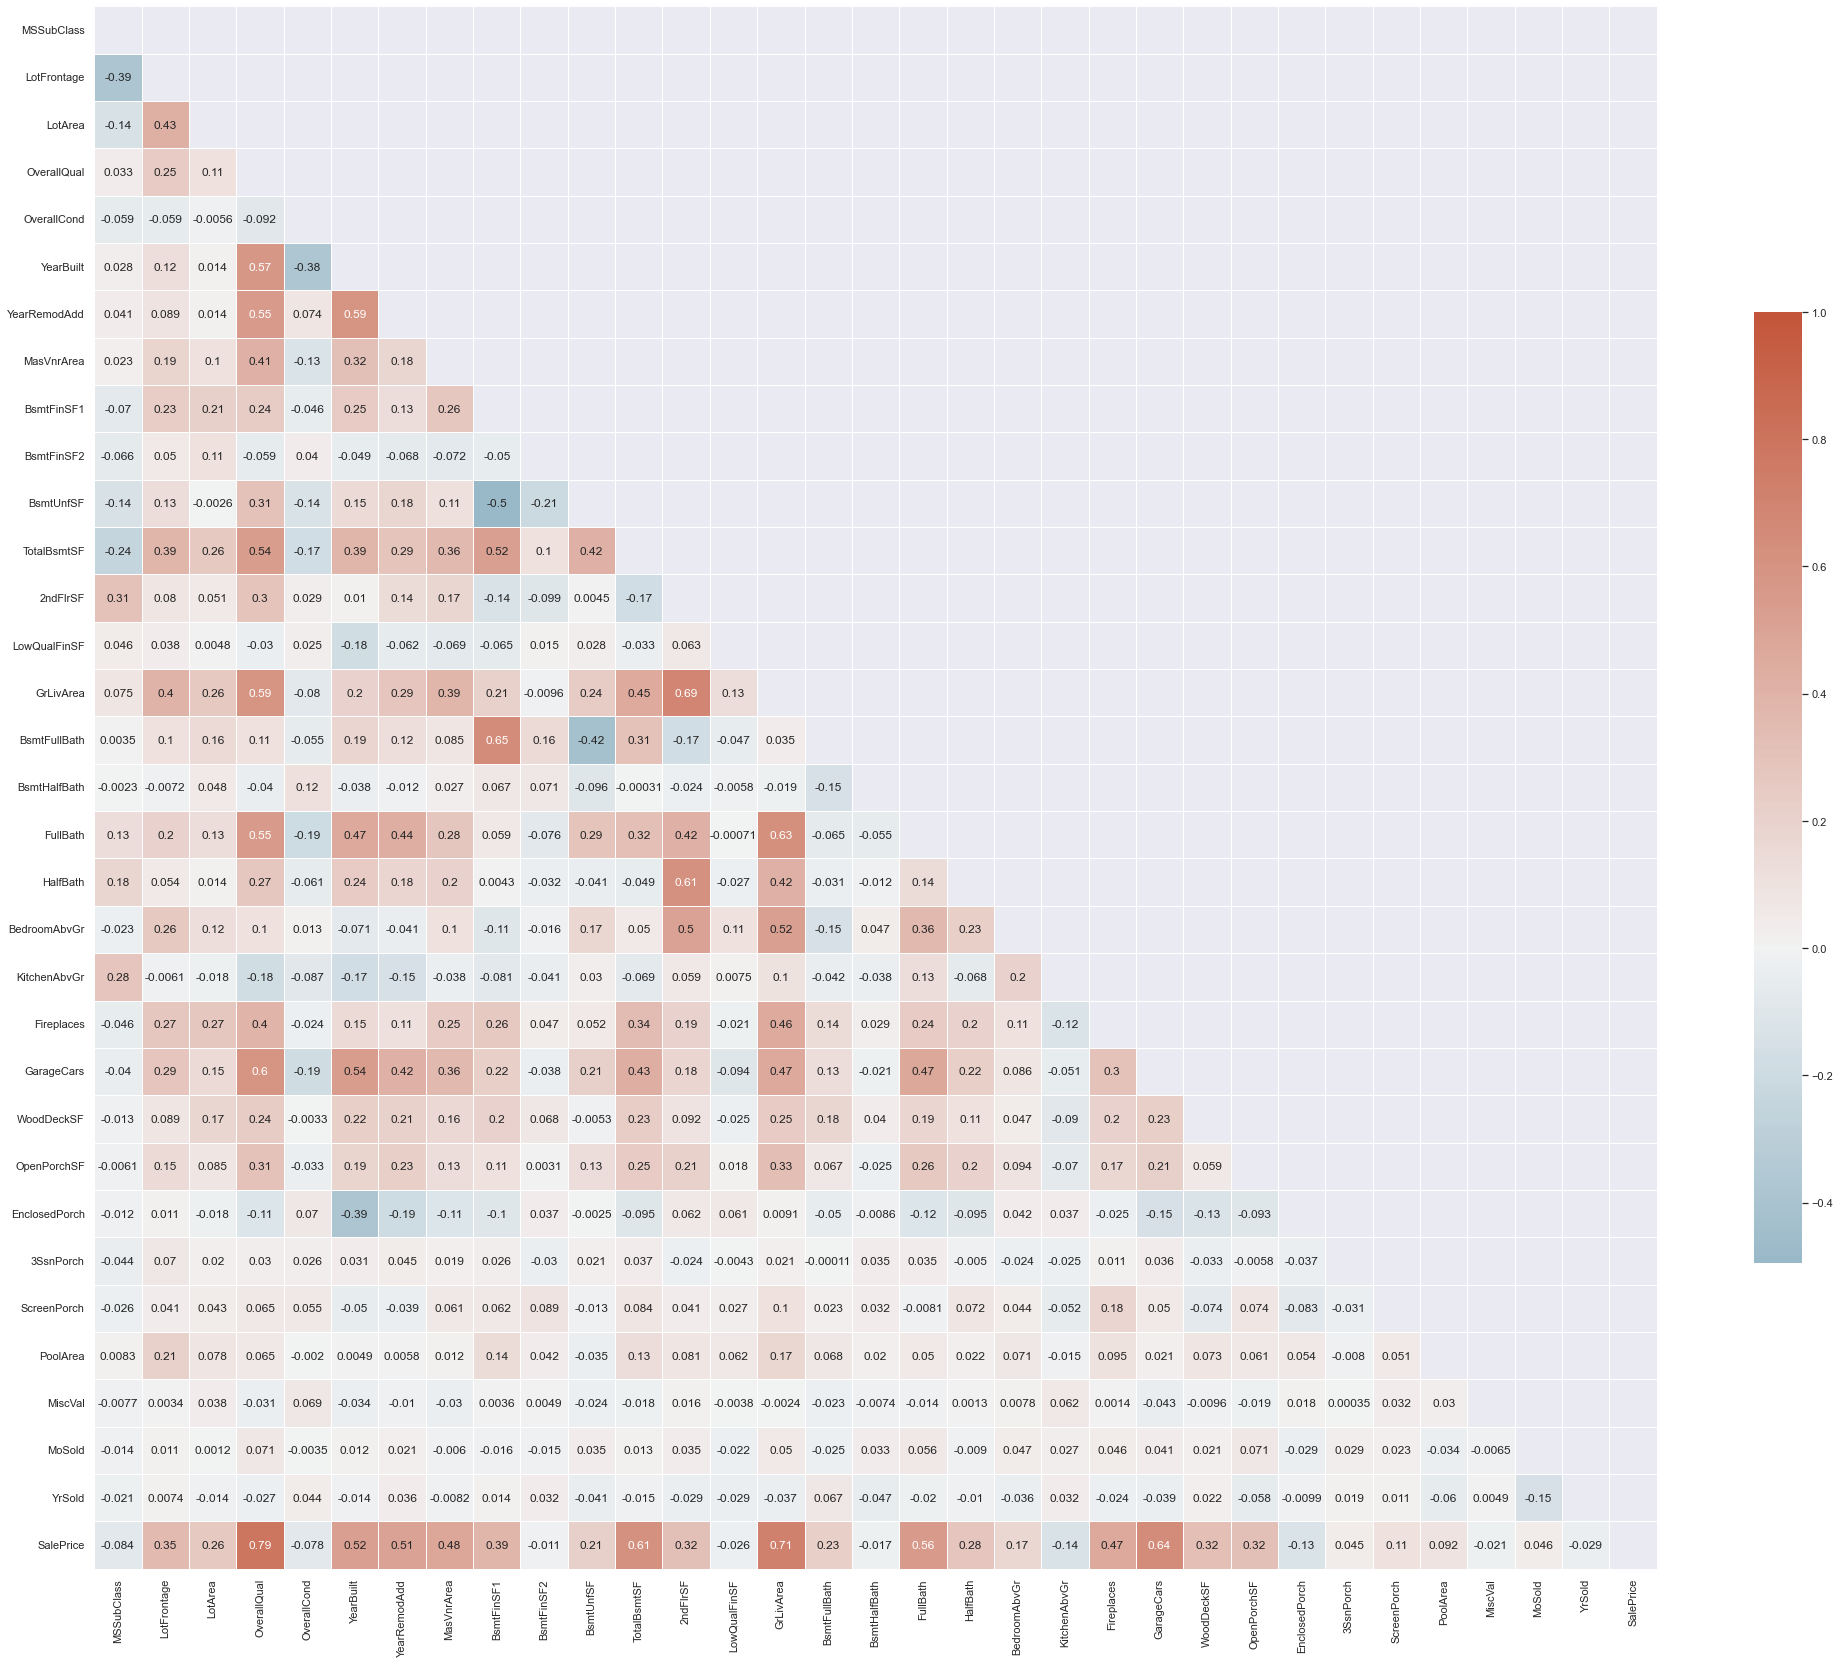

In [550]:
f, ax = plt.subplots(figsize=(35,35))
mat = df_train.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# outliers detection

In [375]:
Q1 = np.percentile(df_train['SalePrice'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_train['SalePrice'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [376]:
upper = df_train['SalePrice'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = df_train['SalePrice'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: SalePrice, Length: 1460, dtype: bool
(array([  11,   53,   58,  112,  151,  161,  178,  185,  224,  231,  278,
        309,  313,  320,  321,  336,  349,  378,  389,  440,  473,  477,
        481,  496,  515,  527,  585,  591,  608,  642,  644,  654,  661,
        664,  678,  688,  691,  702,  718,  769,  774,  798,  803,  825,
        877,  898,  987,  990, 1046, 1142, 1169, 1181, 1182, 1228, 1243,
       1267, 1268, 1353, 1373, 1388, 1437], dtype=int64),)
Lower bound: 0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: SalePrice, Length: 1460, dtype: bool
(array([], dtype=int64),)


In [450]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


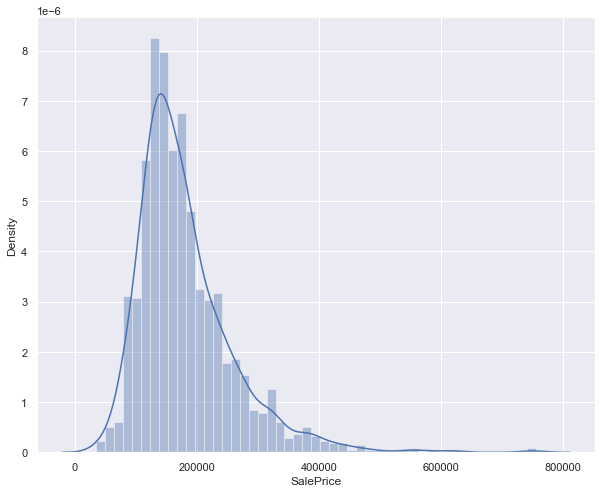

<Figure size 576x720 with 0 Axes>

In [455]:
sns.distplot(df_train['SalePrice'])
plt.figure(figsize=(8,10))
plt.show()

In [456]:
df_num_corr = df_train[num_cols].corr()
df_num_corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.040110,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.285691,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.154871,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.600671,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.185758,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.537850,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.420622,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.364204,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.224054,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,-0.038264,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706


In [485]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


# Splitting the data into x and y

In [551]:
from sklearn.model_selection import train_test_split

In [552]:
x=df_train.drop("SalePrice",axis=1)
y=df_train["SalePrice"]

In [553]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [555]:
x_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1054,60,RL,90.0,11367,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,60,0,0,0,0,0,11,2006,WD,Normal
361,50,RL,NaN,9144,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,7,2008,WD,Normal
1282,20,RL,61.0,8800,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,288,0,0,9,2009,WD,Normal
161,60,RL,110.0,13688,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,3,2008,WD,Normal
515,20,RL,94.0,12220,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,54,0,0,0,0,0,9,2009,New,Partial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,120,RM,44.0,4224,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,110,0,0,0,0,0,6,2007,WD,Normal
1190,190,RL,NaN,32463,Pave,Reg,Low,AllPub,Inside,Mod,...,0,0,0,0,0,0,3,2007,WD,Normal
683,20,RL,90.0,11248,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,45,0,0,0,0,0,7,2007,WD,Normal
189,120,RL,41.0,4923,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,120,0,0,224,0,0,8,2008,WD,Normal


# preprocessing

In [556]:
from sklearn.impute import SimpleImputer

In [557]:
cat_imputer=SimpleImputer(strategy="most_frequent")
cat_imputer.fit(x_train[cat_cols])

SimpleImputer(strategy='most_frequent')

In [558]:
cat_train=pd.DataFrame(cat_imputer.transform(x_train[cat_cols]),columns=cat_cols)
cat_test=pd.DataFrame(cat_imputer.transform(x_test[cat_cols]),columns=cat_cols)

In [559]:
num_imputer=SimpleImputer(strategy="median")
num_imputer.fit(x_train[num_cols])

SimpleImputer(strategy='median')

In [560]:
nume_train = pd.DataFrame(num_imputer.transform(x_train[num_cols]),columns = num_cols)
nume_test = pd.DataFrame(num_imputer.transform(x_test[num_cols]),columns = num_cols)

# Scaling the data

In [561]:
st = StandardScaler()
st.fit_transform(nume_train)
num_train = pd.DataFrame(num_imputer.transform(nume_train),columns = num_cols)
num_test = pd.DataFrame(num_imputer.transform(nume_test),columns = num_cols)


# Dummyfing to categorical to numerical

In [562]:
le = LabelEncoder()
def label(cat_train):
    for i in cat_train.columns:
       cat_train[i]=le.fit_transform(cat_train[i])

In [563]:
label(cat_train)

In [564]:
label(cat_test)

# contact the dummyfing values

In [565]:
x_tr=pd.concat([num_train,cat_train],axis=1)

In [566]:
x_te=pd.concat([num_test,cat_test],axis=1)

In [567]:
x_tr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,20.0,84.0,12615.0,6.0,7.0,1950.0,2001.0,0.0,477.0,0.0,...,2,6,2,1,2,4,4,2,8,4
1,20.0,86.0,11210.0,7.0,5.0,2005.0,2006.0,240.0,20.0,0.0,...,2,6,2,1,1,4,4,2,6,5
2,70.0,70.0,12155.0,6.0,8.0,1925.0,1950.0,0.0,156.0,0.0,...,1,6,2,5,2,4,4,1,8,4
3,20.0,109.0,8724.0,5.0,5.0,1968.0,1968.0,0.0,492.0,0.0,...,3,6,3,1,0,4,4,2,8,4
4,20.0,71.0,9353.0,4.0,5.0,1970.0,1970.0,0.0,0.0,0.0,...,3,6,2,1,2,4,4,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,60.0,70.0,16545.0,8.0,5.0,1998.0,1998.0,731.0,781.0,0.0,...,2,6,4,1,0,4,4,2,8,4
1164,180.0,21.0,1596.0,4.0,5.0,1973.0,1973.0,0.0,462.0,0.0,...,3,6,2,3,2,4,4,2,8,4
1165,160.0,24.0,1950.0,6.0,6.0,1980.0,1980.0,0.0,81.0,612.0,...,3,6,4,1,0,4,4,2,0,4
1166,20.0,124.0,16158.0,7.0,5.0,2005.0,2005.0,16.0,1274.0,0.0,...,2,6,2,1,0,4,4,2,8,4


In [568]:
x_te

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60.0,90.0,11367.0,8.0,5.0,2002.0,2002.0,210.0,932.0,0.0,...,2,4,2,1,0,4,3,2,6,3
1,50.0,70.0,9144.0,5.0,5.0,1940.0,1982.0,0.0,399.0,0.0,...,3,4,2,5,2,4,3,0,6,3
2,20.0,61.0,8800.0,5.0,7.0,1977.0,2008.0,0.0,532.0,144.0,...,2,4,2,5,2,4,3,2,6,3
3,60.0,110.0,13688.0,9.0,5.0,2003.0,2004.0,664.0,1016.0,0.0,...,0,4,2,3,0,4,3,2,6,3
4,20.0,94.0,12220.0,10.0,5.0,2009.0,2009.0,305.0,1436.0,0.0,...,0,4,2,1,0,4,3,2,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,120.0,44.0,4224.0,5.0,7.0,1976.0,1976.0,0.0,840.0,0.0,...,3,4,4,1,2,4,3,2,6,3
288,190.0,70.0,32463.0,4.0,4.0,1961.0,1975.0,149.0,1159.0,0.0,...,3,4,4,0,0,4,3,2,6,3
289,20.0,90.0,11248.0,9.0,5.0,2002.0,2002.0,215.0,1059.0,0.0,...,2,4,4,1,0,4,3,2,6,3
290,120.0,41.0,4923.0,8.0,5.0,2001.0,2002.0,0.0,1153.0,0.0,...,0,4,2,1,0,4,3,2,6,3


# model building

In [573]:
def score(y_train,ypred,y_test,y_pred):
    print(f" rmse-training score:{np.sqrt(mean_squared_error(y_train,ypred))}")
    print(f"rmse-test score:{np.sqrt(mean_squared_error(y_test,y_pred))}")
    print(f" r2-training score:{r2_score(y_train,ypred)}")
    print(f" r2-test score:{r2_score(y_test,y_pred)}")

In [574]:
from sklearn.tree import DecisionTreeRegressor
param_grid = {'max_depth' : range(1,10), 
              'min_impurity_decrease' : [0.0001,0.1, 0.01]}

In [575]:
dt=DecisionTreeRegressor()
gdt = GridSearchCV(estimator=dt, param_grid=param_grid, cv= 3)
%time gdt.fit(x_tr,y_train)
ypred=gdt.predict(x_tr)
y_pred=gdt.predict(x_te)

CPU times: total: 531 ms
Wall time: 542 ms


In [576]:
score(y_train,ypred,y_test,y_pred)

 rmse-training score:14163.864126201672
rmse-test score:37421.124063528725
 r2-training score:0.9686257926470351
 r2-test score:0.7647703577515068


In [577]:
## Linear Ridge regression
from sklearn.linear_model import Ridge

In [578]:
lr=Ridge()
lr.fit(x_tr,y_train)
ypred=lr.predict(x_tr)
y_pred=lr.predict(x_te)

In [580]:
score(y_train,ypred,y_test,y_pred)

 rmse-training score:27580.623313663684
rmse-test score:58300.88044008846
 r2-training score:0.8810354921219008
 r2-test score:0.4290361433584131


In [581]:
from sklearn.linear_model import LinearRegression

In [583]:
l = LinearRegression()
l.fit(x_tr,y_train)
ypred = l.predict(x_tr)
y_pred = l.predict(x_te)

In [584]:
score(y_train,ypred,y_test,y_pred)

 rmse-training score:27573.363404814056
rmse-test score:61124.28128483617
 r2-training score:0.8810981127381039
 r2-test score:0.37239568373487275


## Conclusion : 

I tried above algorithms the best model is RandomForest regression.